## Import the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

## Load the Dataset

In [2]:
data=pd.read_csv(r"C:\Users\LENOVO\Downloads\bank_1.csv")

In [3]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
data.shape

(41188, 21)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

In [6]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [7]:
cat_data=data[data.dtypes[data.dtypes=="object"].index]
num_data=data[data.dtypes[data.dtypes!="object"].index]

In [8]:
cat_data.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no


In [9]:
num_data.head()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0


In [10]:
cat_data["job"].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [11]:
cat_data["job"]=cat_data["job"].replace(["management", "admin."], "white-collar")
cat_data["job"]=cat_data["job"].replace(["services", "housemaid"], "pink-collar")
cat_data["job"]=cat_data["job"].replace(["retired", "student", "unemployed", "unknown"], "others")
cat_data["job"]=cat_data["job"].replace(["self-employed", "entrepreneur"], "self-depend")

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8868\2163544750.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_data["job"]=cat_data["job"].replace(["management", "admin."], "white-collar")
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8868\2163544750.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_data["job"]=cat_data["job"].replace(["services", "housemaid"], "pink-collar")
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8868\2163544750.py:3: SettingWithCopyWarning: 
A value is trying to be set on

In [12]:
cat_data["job"].value_counts()

white-collar    13346
blue-collar      9254
technician       6743
pink-collar      5029
others           3939
self-depend      2877
Name: job, dtype: int64

In [13]:
cat_data["education"].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [14]:
cat_data["housing"].value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [15]:
cat_data["marital"].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [16]:
cat_data["y"].value_counts()

no     36548
yes     4640
Name: y, dtype: int64

In [17]:
cat_data["day_of_week"].value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

In [18]:
cat_data["month"].value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [19]:
cat_data["poutcome"].value_counts()

nonexistent    35563
failure         4252
success         1373
Name: poutcome, dtype: int64

In [20]:
num_data["campaign"].value_counts()

1     17642
2     10570
3      5341
4      2651
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
16       51
15       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
28        8
26        8
25        8
31        7
30        7
35        5
32        4
33        4
34        3
42        2
40        2
43        2
56        1
39        1
41        1
37        1
Name: campaign, dtype: int64

In [21]:
num_data["cons.conf.idx"].value_counts()

-36.4    7763
-42.7    6685
-46.2    5794
-36.1    5175
-41.8    4374
-42.0    3616
-47.1    2458
-31.4     770
-40.8     715
-26.9     447
-30.1     357
-40.3     311
-37.5     303
-50.0     282
-29.8     267
-34.8     264
-38.3     233
-39.8     229
-40.0     212
-49.5     204
-33.6     178
-34.6     174
-33.0     172
-50.8     128
-40.4      67
-45.9      10
Name: cons.conf.idx, dtype: int64

In [22]:
num_data["pdays"].value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: pdays, dtype: int64

In [23]:
num_data["duration"].value_counts()

90      170
85      170
136     168
73      167
124     164
       ... 
1569      1
1053      1
1263      1
1169      1
1868      1
Name: duration, Length: 1544, dtype: int64

In [24]:
num_data["nr.employed"].value_counts()

5228.1    16234
5099.1     8534
5191.0     7763
5195.8     3683
5076.2     1663
5017.5     1071
4991.6      773
5008.7      650
4963.6      635
5023.5      172
5176.3       10
Name: nr.employed, dtype: int64

## Elaborate Data Analysis

#### Univariate Analysis

#### CountPlot

In [25]:
cat_data.columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

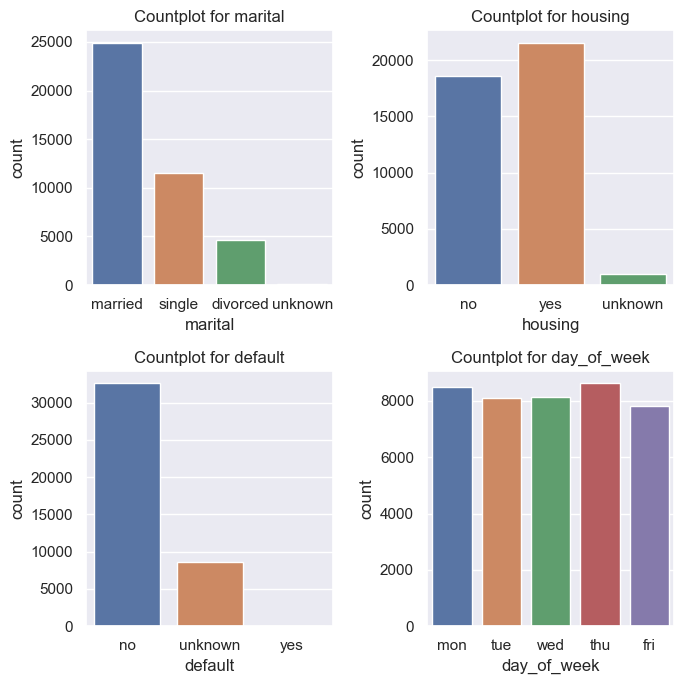

In [26]:
cols=["marital","housing","default","day_of_week"]
plt.figure(figsize=(7,7))
for i in range(len(cols)):
    plt.subplot(2,2,i+1)
    sns.countplot(x=data[cols[i]])
    plt.title(f"Countplot for {cols[i]}")
plt.tight_layout()
plt.show()

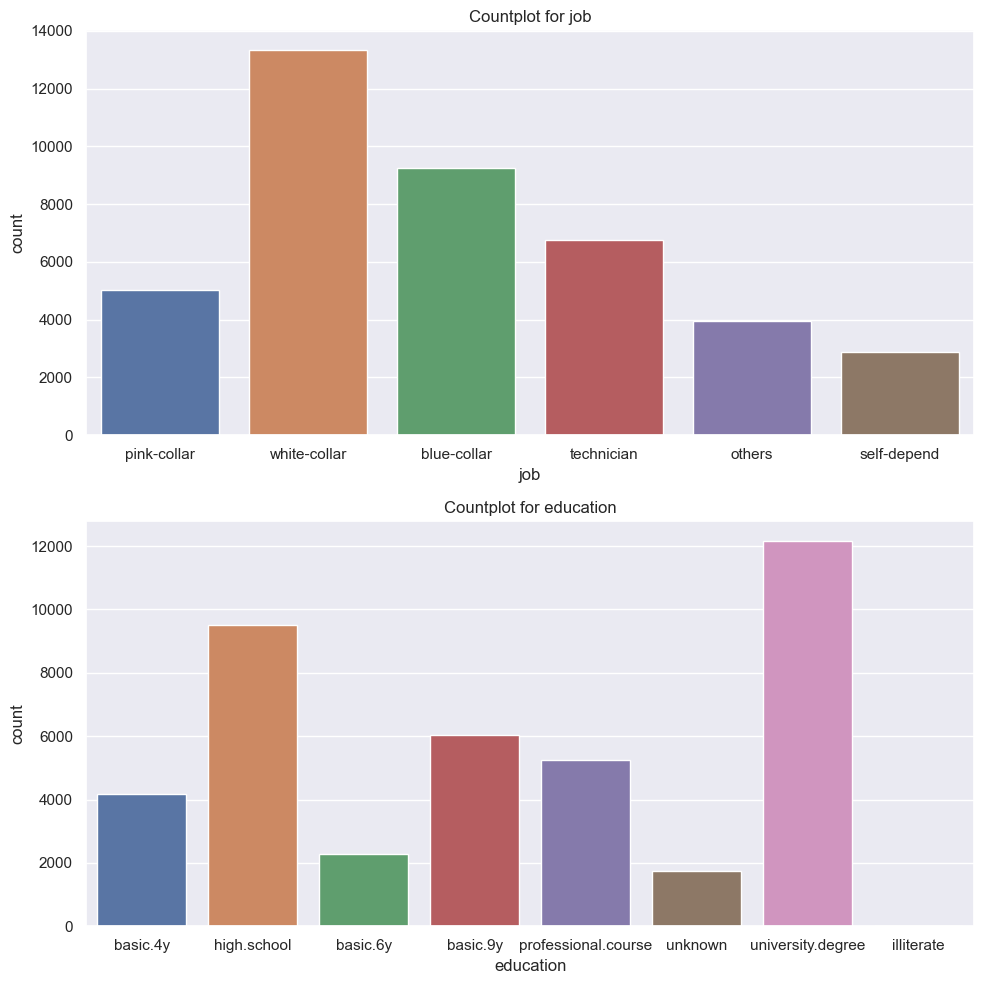

In [27]:
cols=["job","education"]
plt.figure(figsize=(10,10))
for i in range(len(cols)):
    plt.subplot(2,1,i+1)
    sns.countplot(x=cat_data[cols[i]])
    plt.title(f"Countplot for {cols[i]}")
plt.tight_layout()
plt.show()

#### BoxPlot

In [28]:
num_data.columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

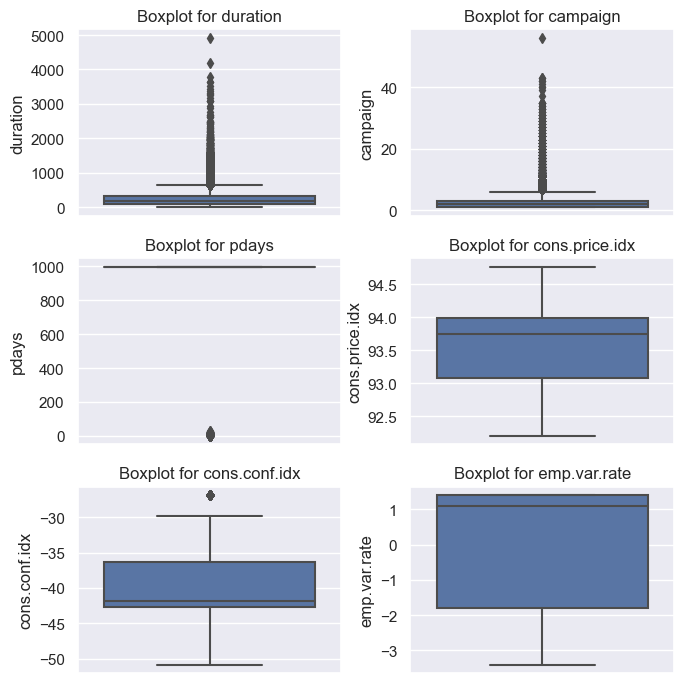

In [29]:
cols=["duration","campaign","pdays","cons.price.idx","cons.conf.idx","emp.var.rate"]
plt.figure(figsize=(7,7))
for i in range(len(cols)):
    plt.subplot(3,2,i+1)
    sns.boxplot(y=num_data[cols[i]])
    plt.title(f"Boxplot for {cols[i]}")
plt.tight_layout()
plt.show()

## Bivariate Analysis

In [30]:
def plot_bar(column):
    # temp df 
    temp_1 = pd.DataFrame()
    # count categorical values
    temp_1['No_deposit'] = data[data['y'] == 'no'][column].value_counts()
    temp_1['Yes_deposit'] = data[data['y'] == 'yes'][column].value_counts()
    temp_1.plot(kind='bar')
    plt.xlabel(f'{column}')
    plt.ylabel('Number of clients')
    plt.title('Distribution of {} and deposit'.format(column))
    plt.show()

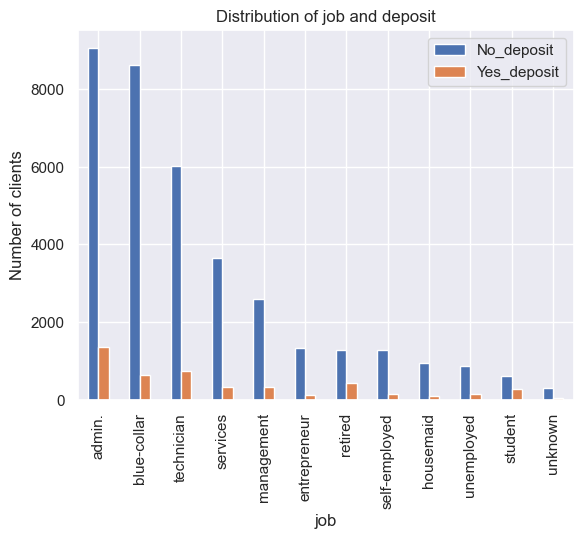

In [31]:
plot_bar("job")

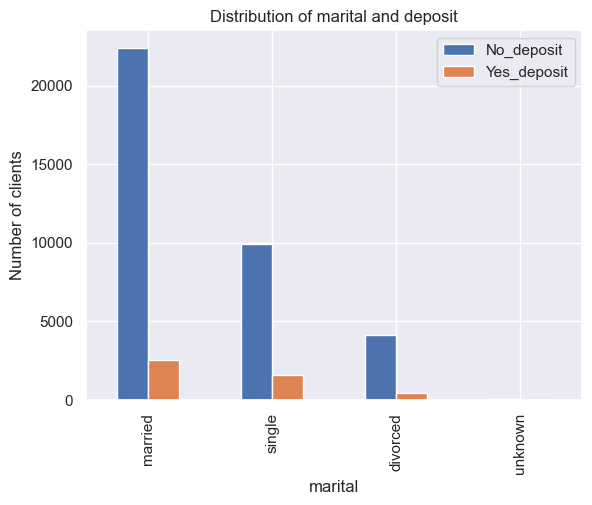

In [32]:
plot_bar("marital")

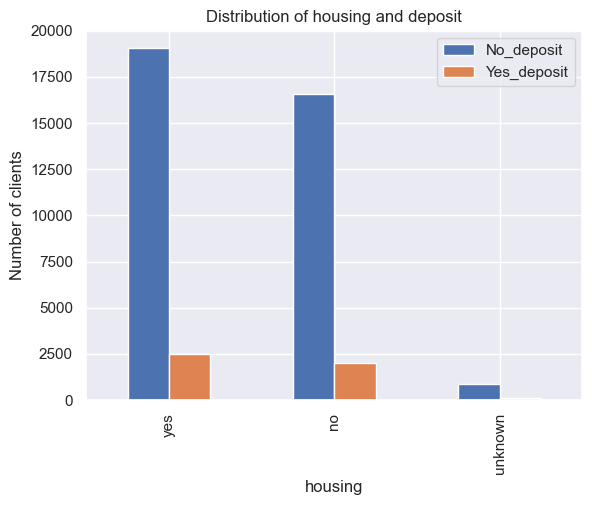

In [33]:
plot_bar("housing")

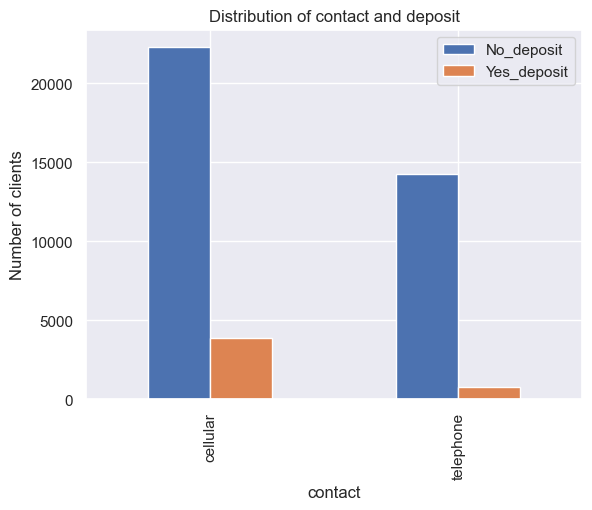

In [34]:
plot_bar("contact")

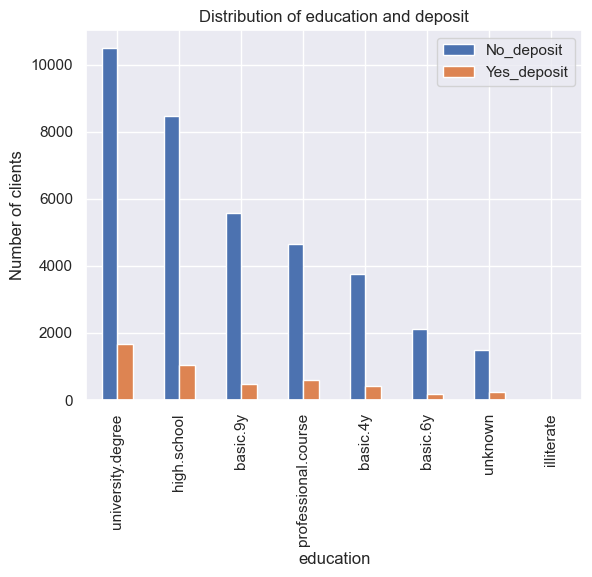

In [35]:
plot_bar("education")

**Primary analysis of several categorical features reveals:**

1. Administrative staff and technical specialists opened the deposit most of all. In relative terms, a high proportion of pensioners and students might be mentioned as well.
2. Although in absolute terms married consumers more often agreed to the service, in relative terms the single was responded better.
3. Best communication channel is secullar.
4. The difference is evident between consumers who already use the services of banks and received a loan.
5. Home ownership does not greatly affect marketing company performance.



## Label Encoding for Target Variable¶

In [36]:
data.y = data.y.map({'no':0, 'yes':1})

In [37]:
data["y"].value_counts()

0    36548
1     4640
Name: y, dtype: int64

## Correlation

In [38]:
data_num = data.copy()
corr = data_num.corr()
corr

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8868\2580283590.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data_num.corr()


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
age,1.000000,-0.000866,0.004594,-0.034369,0.024365,-0.000371,0.000857,0.129372,0.010767,-0.017725,0.030399
duration,-0.000866,1.000000,-0.071699,-0.047577,0.020640,-0.027968,0.005312,-0.008173,-0.032897,-0.044703,0.405274
campaign,0.004594,-0.071699,1.000000,0.052584,-0.079141,0.150754,0.127836,-0.013733,0.135133,0.144095,-0.066357
pdays,-0.034369,-0.047577,0.052584,1.000000,-0.587514,0.271004,0.078889,-0.091342,0.296899,0.372605,-0.324914
previous,0.024365,0.020640,-0.079141,-0.587514,1.000000,-0.420489,-0.203130,-0.050936,-0.454494,-0.501333,0.230181
emp.var.rate,-0.000371,-0.027968,0.150754,0.271004,-0.420489,1.000000,0.775334,0.196041,0.972245,0.906970,-0.298334
cons.price.idx,0.000857,0.005312,0.127836,0.078889,-0.203130,0.775334,1.000000,0.058986,0.688230,0.522034,-0.136211
cons.conf.idx,0.129372,-0.008173,-0.013733,-0.091342,-0.050936,0.196041,0.058986,1.000000,0.277686,0.100513,0.054878
euribor3m,0.010767,-0.032897,0.135133,0.296899,-0.454494,0.972245,0.688230,0.277686,1.000000,0.945154,-0.307771
nr.employed,-0.017725,-0.044703,0.144095,0.372605,-0.501333,0.906970,0.522034,0.100513,0.945154,1.000000,-0.354678


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8868\2493446871.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_num.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)


<Axes: >

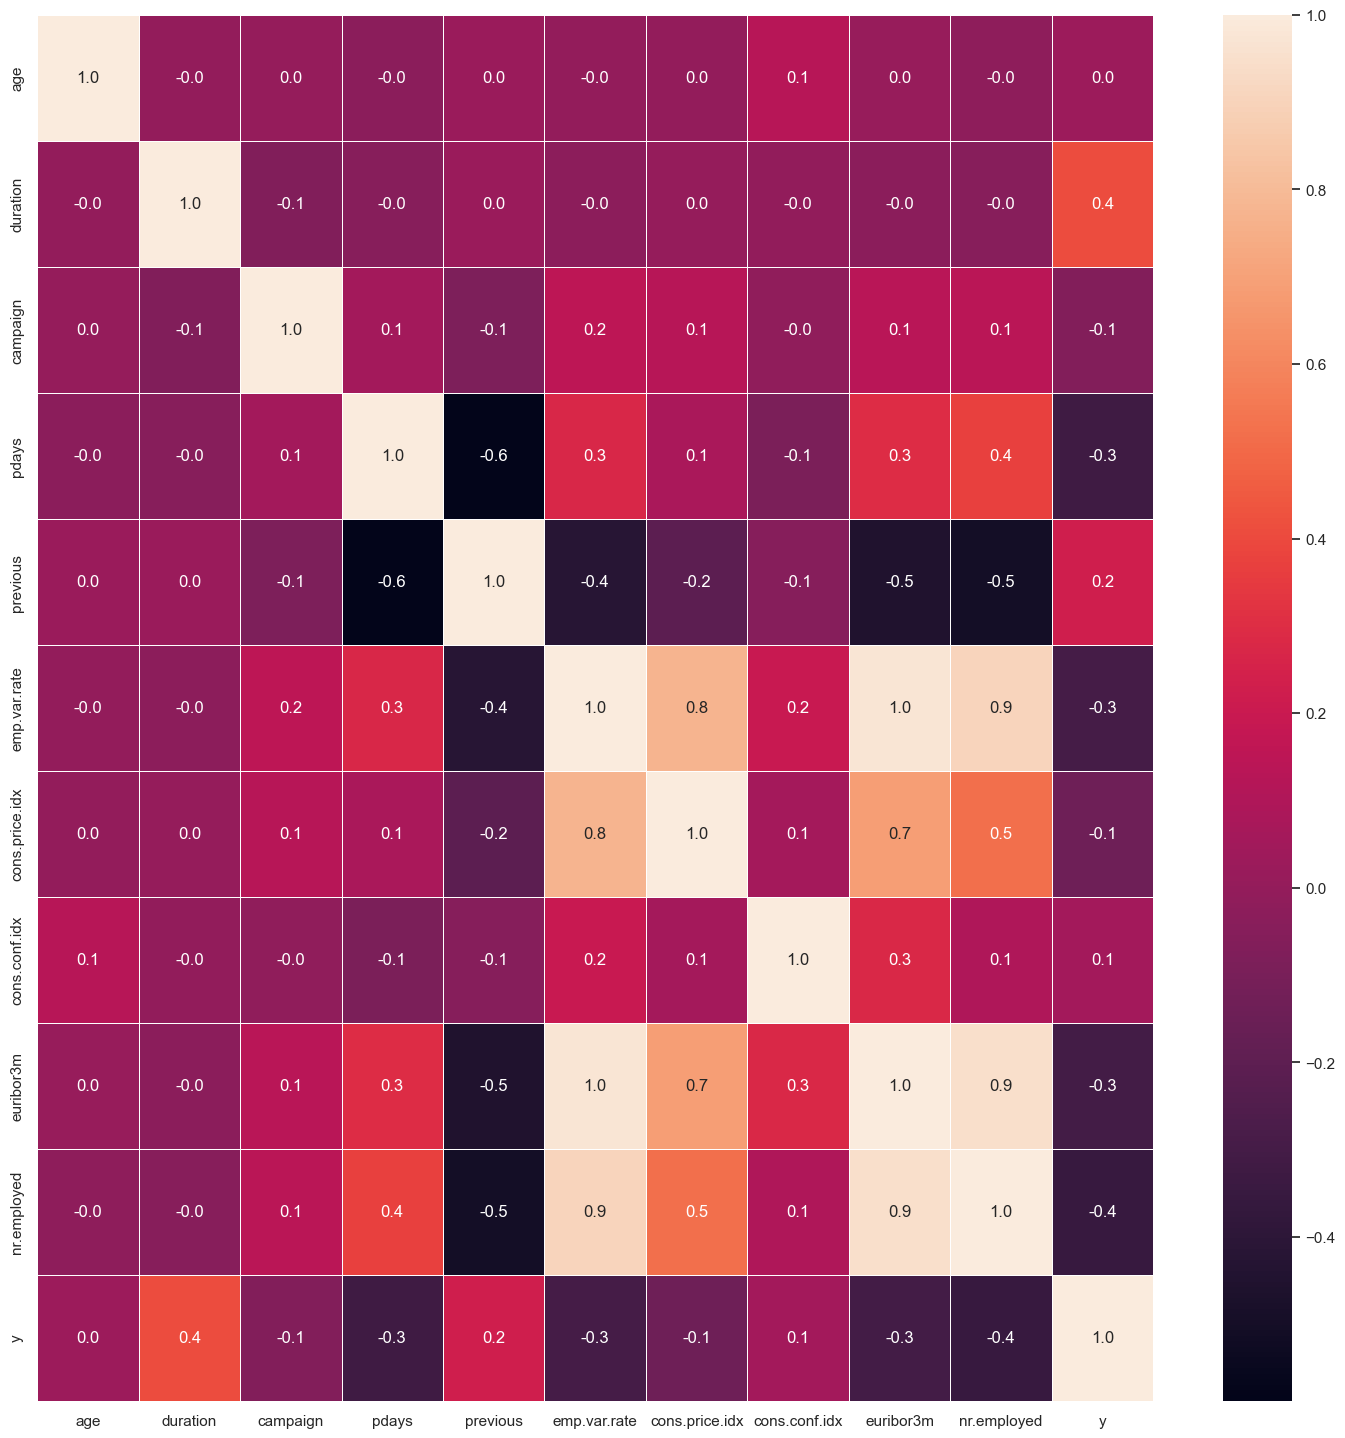

In [39]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data_num.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax)

## Data Cleaning

In [40]:
# Replace NaN values with 0 in the 'contact' column
data['contact'] = data['contact'].map({"cellular": 1, "telephone": 0}).fillna(0).astype("uint8")

# Replace NaN values with 0 in the 'loan' column
data['loan'] = data['loan'].map({"yes": 1, "no": 0, "unknown": 0}).fillna(0).astype("uint8")

# Replace NaN values with 0 in the 'housing' column
data['housing'] = data['housing'].map({"yes": 1, "no": 0, "unknown": 0}).fillna(0).astype("uint8")


In [41]:
data["default"] = data["default"].map({'no': 1, 'unknown': 0, 'yes': 0}).fillna(0).astype('uint8')
data["pdays"] = data["pdays"].replace(999,0)
data["previous"]=data["previous"].apply(lambda x: 1 if x > 0 else 0).astype('uint8')

In [42]:
# change the range of Var Rate
data['emp.var.rate'] = data['emp.var.rate'].apply(lambda x: x*-0.0001 if x > 0 else x*1)
data['emp.var.rate'] = data['emp.var.rate'] * -1
data['emp.var.rate'] = data['emp.var.rate'].apply(lambda x: -np.log(x) if x < 1 else np.log(x)).astype('uint8')

In [43]:
data['cons.price.idx'] = (data['cons.price.idx'] * 10).astype('uint8')

In [44]:
data['cons.conf.idx'] = data['cons.conf.idx'] * -1

In [45]:
data.poutcome = data.poutcome.map({'nonexistent':0, 'failure':0, 'success':1}).astype('uint8') 

In [46]:
data['nr.employed'] = np.log2(data['nr.employed']).astype('uint8')
data['cons.price.idx'] = np.log2(data['cons.price.idx']).astype('uint8')
data['cons.conf.idx'] = np.log2(data['cons.conf.idx']).astype('uint8')
data.age = np.log(data.age)

In [47]:
data.euribor3m = data.euribor3m.astype('uint8')
data.campaign = data.campaign.astype('uint8')
data.pdays = data.pdays.astype('uint8')

In [48]:
def encode(data, col):
    return pd.concat([data, pd.get_dummies(col, prefix=col.name)], axis=1)

In [49]:
data = encode(data, data.job)
data = encode(data, data.month)
data = encode(data, data.day_of_week)

In [50]:
data.drop(['job', 'month', 'day_of_week'], axis=1, inplace=True)

In [51]:
data.head()

,age,marital,education,default,housing,loan,contact,duration,campaign,pdays,...,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,4.025352,married,basic.4y,1,0,0,0,261,1,0,...,0,1,0,0,0,0,1,0,0,0
1,4.043051,married,high.school,0,0,0,0,149,1,0,...,0,1,0,0,0,0,1,0,0,0
2,3.610918,married,high.school,1,1,0,0,226,1,0,...,0,1,0,0,0,0,1,0,0,0
3,3.688879,married,basic.6y,1,0,0,0,151,1,0,...,0,1,0,0,0,0,1,0,0,0
4,4.025352,married,high.school,1,0,1,0,307,1,0,...,0,1,0,0,0,0,1,0,0,0


## Drop Duplicates

In [52]:
data.duplicated().sum()

13

In [54]:
data.drop_duplicates(inplace=True)

In [55]:
data.duplicated().sum()

0

## Target encoding for two categorical feature

In [56]:
import category_encoders as ce
# save target variable before transformation
y = data.y
# Create target encoder object and transoform two value
target_encode = ce.target_encoder.TargetEncoder(cols=['marital', 'education']).fit(data, y)
numeric_dataset = target_encode.transform(data)
# drop target variable
numeric_dataset.drop('y', axis=1, inplace=True)

In [57]:
numeric_dataset.head()

,age,marital,education,default,housing,loan,contact,duration,campaign,pdays,...,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed
0,4.025352,0.101565,0.102490,1,0,0,0,261,1,0,...,0,1,0,0,0,0,1,0,0,0
1,4.043051,0.101565,0.108389,0,0,0,0,149,1,0,...,0,1,0,0,0,0,1,0,0,0
2,3.610918,0.101565,0.108389,1,1,0,0,226,1,0,...,0,1,0,0,0,0,1,0,0,0
3,3.688879,0.101565,0.082060,1,0,0,0,151,1,0,...,0,1,0,0,0,0,1,0,0,0
4,4.025352,0.101565,0.108389,1,0,1,0,307,1,0,...,0,1,0,0,0,0,1,0,0,0


## Feature Selection

In [58]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split

In [59]:
X_train,X_test,y_train,y_test = train_test_split(numeric_dataset,y,test_size=0.3)

In [60]:
sel = SelectFromModel(RandomForestClassifier(n_estimators = 100))
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestClassifier())

In [61]:
sel.get_support()

array([ True,  True,  True, False, False, False, False,  True,  True,
        True, False,  True,  True, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

In [62]:
selected_feat= numeric_dataset.columns[(sel.get_support())]
len(selected_feat)

9

In [63]:
x = numeric_dataset[selected_feat]

In [64]:
selected_feat

Index(['age', 'marital', 'education', 'duration', 'campaign', 'pdays',
       'poutcome', 'emp.var.rate', 'euribor3m'],
      dtype='object')

## Handling Unbalanced Labels

Number of Client subscribed :  36536
Number of Clients not subscribed  :  4639


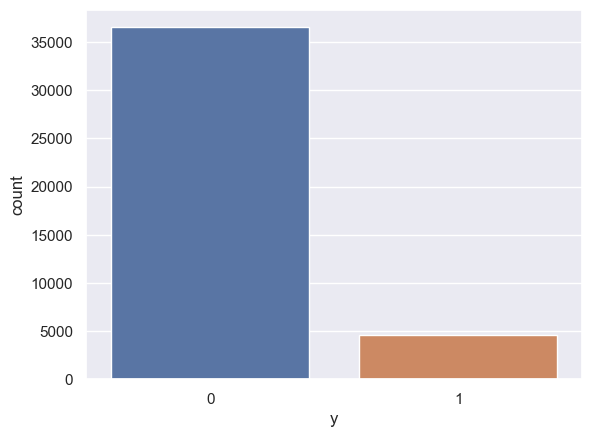

In [65]:
ax = sns.countplot(x=y,label="Count")     
S, N = y.value_counts()
print('Number of Client subscribed : ',S)
print('Number of Clients not subscribed  : ',N)

In [66]:
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from matplotlib import pyplot
from numpy import where
# summarize class distribution
counter = Counter(y)
print(counter)
# transform the dataset
oversample = SMOTE()
x, y = oversample.fit_resample(numeric_dataset, y)
# summarize the new class distribution
counter = Counter(y)
print(counter)


Counter({0: 36536, 1: 4639})
Counter({0: 36536, 1: 36536})


Number of Client subscribed :  36536
Number of Clients not subscribed  :  36536


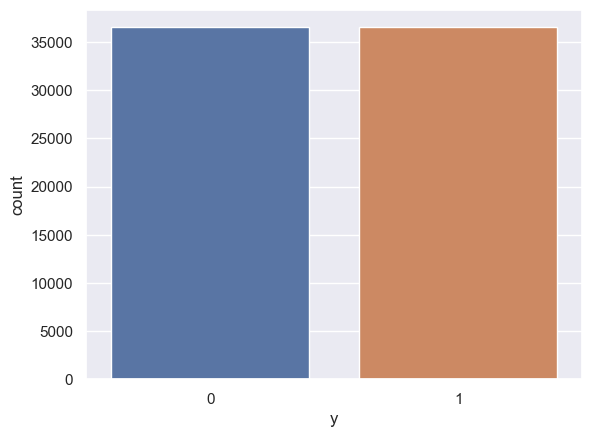

In [67]:
ax = sns.countplot(x=y,label="Count")     
S, N = y.value_counts()
print('Number of Client subscribed : ',S)
print('Number of Clients not subscribed  : ',N)

## Standardizing Data

In [68]:
from sklearn.preprocessing import StandardScaler

In [69]:
st=StandardScaler()

In [70]:
st.fit(x)

StandardScaler()

In [71]:
X=st.fit_transform(x)

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=40)

In [74]:
x_train.shape

(51150, 44)

In [75]:
x_test.shape

(21922, 44)

In [76]:
y_train.shape

(51150,)

In [77]:
y_test.shape

(21922,)

## Supervised Learning

## Logistic Regression

In [78]:
from sklearn.linear_model import LogisticRegression

In [79]:
lr=LogisticRegression()

In [80]:
lr.fit(x_train,y_train)

C:\Users\LENOVO\Documents\New folder\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [81]:
y_pred_train_lr=lr.predict(x_train)
y_pred_test_lr=lr.predict(x_test)

In [82]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [83]:
print(confusion_matrix(y_train,y_pred_train_lr))
print(confusion_matrix(y_test,y_pred_test_lr))

[[24319  1301]
 [ 1916 23614]]
[[10312   604]
 [  789 10217]]


In [84]:
print(classification_report(y_train,y_pred_train_lr))
print(classification_report(y_test,y_pred_test_lr))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94     25620
           1       0.95      0.92      0.94     25530

    accuracy                           0.94     51150
   macro avg       0.94      0.94      0.94     51150
weighted avg       0.94      0.94      0.94     51150

              precision    recall  f1-score   support

           0       0.93      0.94      0.94     10916
           1       0.94      0.93      0.94     11006

    accuracy                           0.94     21922
   macro avg       0.94      0.94      0.94     21922
weighted avg       0.94      0.94      0.94     21922



In [85]:
print(accuracy_score(y_train,y_pred_train_lr))
print(accuracy_score(y_test,y_pred_test_lr))

0.9371065493646139
0.9364565276890795


#### Compute accuracy measures

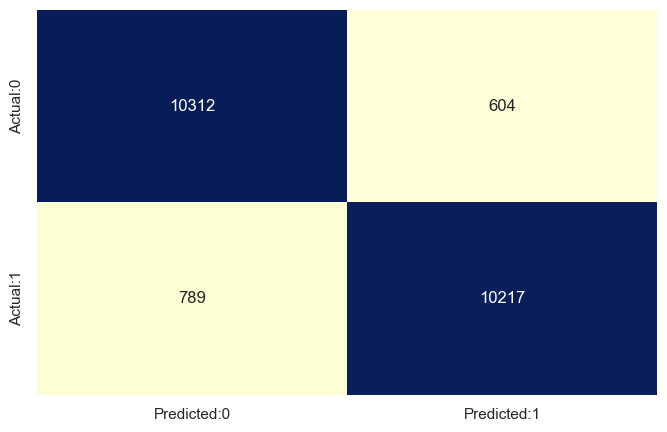

In [86]:
cm = confusion_matrix(y_test, y_pred_test_lr)

# label the confusion matrix  
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])

# set sizeof the plot
plt.figure(figsize = (8,5))

# plot a heatmap
# cmap: colour code used for plotting
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
# cbar=False: Whether to draw a colorbar
# fmt: string formatting code to use when adding annotations
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu", cbar=False)
plt.show()

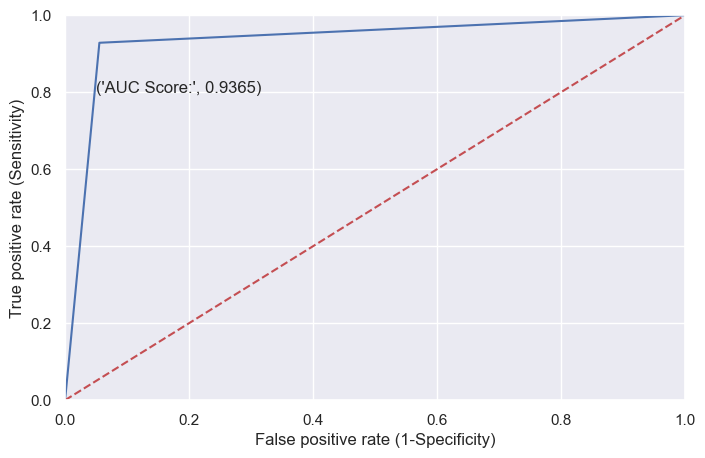

In [87]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
# set the figure size
plt.rcParams['figure.figsize']=(8,5)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_lr)

# plot the ROC curve
plt.plot(fpr,tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add the AUC score
plt.text(x = 0.05, y = 0.8, s =('AUC Score:', round(roc_auc_score(y_test, y_pred_test_lr),4)))

# name the plot, and both axes
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')

# plot the grid
plt.grid(True)

#### We see our classifier is away from the dotted line; which means the meta-estimator model is a good classifier

#### Tabulate the Results

In [89]:
from sklearn import metrics
cols=["Model","AUC Score","Precision Score", "Recall Score", "Accuracy Score", "F1-Score"]
result=pd.DataFrame(columns=cols)
Bagging_Meta_estimator = pd.Series({'Model': "Logistic Regression",
                     'AUC Score' : metrics.roc_auc_score(y_test, y_pred_test_lr),
                 'Precision Score': metrics.precision_score(y_test, y_pred_test_lr),
                 'Recall Score': metrics.recall_score(y_test, y_pred_test_lr),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred_test_lr),
                  'F1-Score':metrics.f1_score(y_test, y_pred_test_lr)})
result=result.append(Bagging_Meta_estimator, ignore_index=True)
result

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8868\485458972.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result=result.append(Bagging_Meta_estimator, ignore_index=True)


,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,F1-Score
0,Logistic Regression,0.93649,0.944183,0.928312,0.936457,0.93618


## Adaboost

In [90]:
from sklearn.ensemble import AdaBoostClassifier

In [91]:
ad=AdaBoostClassifier()

In [92]:
ad.fit(x_train,y_train)

C:\Users\LENOVO\Documents\New folder\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier()

In [93]:
y_pred_train_ad=ad.predict(x_train)
y_pred_test_ad=ad.predict(x_test)

In [94]:
print(confusion_matrix(y_train,y_pred_train_ad))
print(confusion_matrix(y_test,y_pred_test_ad))

[[24287  1333]
 [ 1914 23616]]
[[10324   592]
 [  733 10273]]


In [95]:
print(classification_report(y_train,y_pred_train_ad))
print(classification_report(y_test,y_pred_test_ad))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94     25620
           1       0.95      0.93      0.94     25530

    accuracy                           0.94     51150
   macro avg       0.94      0.94      0.94     51150
weighted avg       0.94      0.94      0.94     51150

              precision    recall  f1-score   support

           0       0.93      0.95      0.94     10916
           1       0.95      0.93      0.94     11006

    accuracy                           0.94     21922
   macro avg       0.94      0.94      0.94     21922
weighted avg       0.94      0.94      0.94     21922



In [96]:
print(accuracy_score(y_train,y_pred_train_ad))
print(accuracy_score(y_test,y_pred_test_ad))

0.9365200391006843
0.9395584344494116


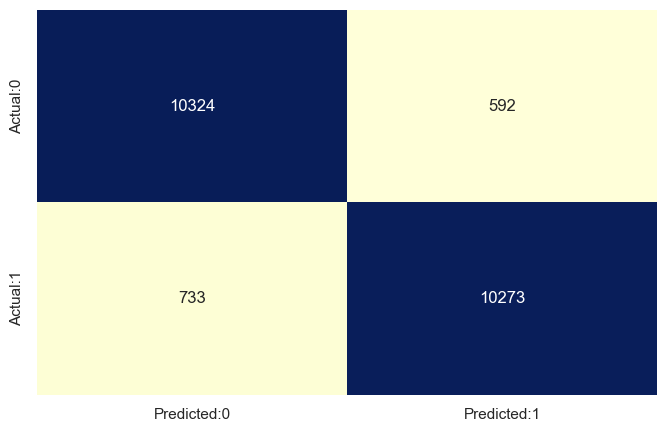

In [97]:
cm = confusion_matrix(y_test, y_pred_test_ad)
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])

# set sizeof the plot
plt.figure(figsize = (8,5))

# plot a heatmap
# cmap: colour code used for plotting
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
# cbar=False: Whether to draw a colorbar
# fmt: string formatting code to use when adding annotations
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu", cbar=False)
plt.show()

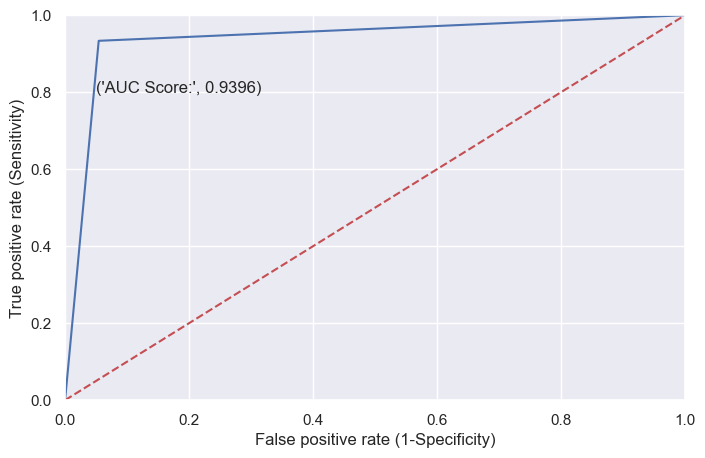

In [98]:
plt.rcParams['figure.figsize']=(8,5)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_ad)

# plot the ROC curve
plt.plot(fpr,tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add the AUC score
plt.text(x = 0.05, y = 0.8, s =('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_test_ad),4)))

# name the plot, and both axes
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')

# plot the grid
plt.grid(True)

#### We see our classifier (Adaboost) is far away from the dotted line; which means that Adaboost is a very good classifier

#### Tabulate the results

In [99]:
adaboost_metrics = pd.Series({'Model': "AdaBoost",
                     'AUC Score' : metrics.roc_auc_score(y_test, y_pred_test_ad),
                 'Precision Score': metrics.precision_score(y_test, y_pred_test_ad),
                 'Recall Score': metrics.recall_score(y_test, y_pred_test_ad),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred_test_ad),
                  'F1-Score':metrics.f1_score(y_test, y_pred_test_ad)})



# appending our result table
result = result.append(adaboost_metrics , ignore_index = True)

# view the result table
result


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8868\1057190412.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(adaboost_metrics , ignore_index = True)


,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,F1-Score
0,Logistic Regression,0.936490,0.944183,0.928312,0.936457,0.936180
1,AdaBoost,0.939584,0.945513,0.933400,0.939558,0.939417


## Decision Tree

In [100]:
from sklearn.tree import DecisionTreeClassifier

In [101]:
dt=DecisionTreeClassifier()

In [102]:
dt.fit(x_train,y_train)

DecisionTreeClassifier()

In [103]:
y_pred_train_dt=dt.predict(x_train)

In [104]:
y_pred_test_dt=dt.predict(x_test)

In [105]:
print(confusion_matrix(y_train,y_pred_train_dt))
print(confusion_matrix(y_test,y_pred_test_dt))

[[25620     0]
 [    0 25530]]
[[10067   849]
 [  688 10318]]


In [106]:
print(classification_report(y_train,y_pred_train_dt))
print(classification_report(y_test,y_pred_test_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25620
           1       1.00      1.00      1.00     25530

    accuracy                           1.00     51150
   macro avg       1.00      1.00      1.00     51150
weighted avg       1.00      1.00      1.00     51150

              precision    recall  f1-score   support

           0       0.94      0.92      0.93     10916
           1       0.92      0.94      0.93     11006

    accuracy                           0.93     21922
   macro avg       0.93      0.93      0.93     21922
weighted avg       0.93      0.93      0.93     21922



In [107]:
print(accuracy_score(y_train,y_pred_train_dt))
print(accuracy_score(y_test,y_pred_test_dt))

1.0
0.9298877839613174


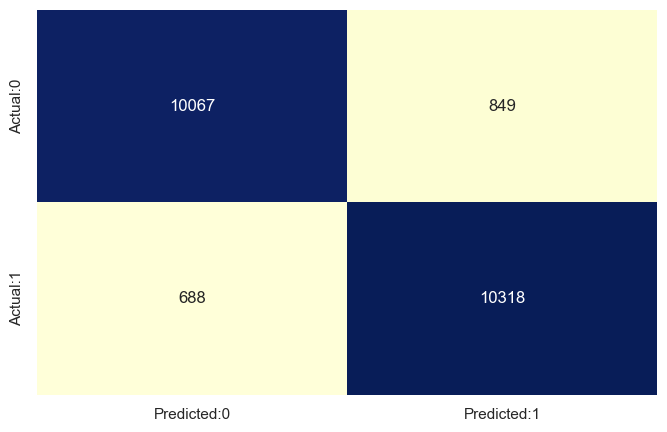

In [108]:
cm = confusion_matrix(y_test, y_pred_test_dt)
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])

# set sizeof the plot
plt.figure(figsize = (8,5))

# plot a heatmap
# cmap: colour code used for plotting
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
# cbar=False: Whether to draw a colorbar
# fmt: string formatting code to use when adding annotations
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu", cbar=False)
plt.show()

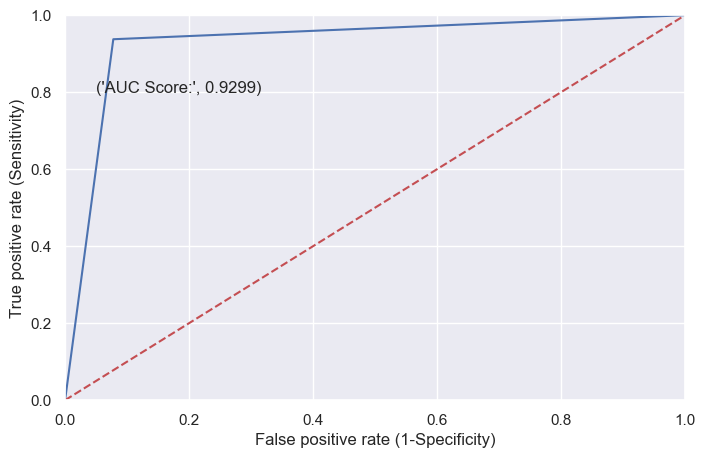

In [109]:
plt.rcParams['figure.figsize']=(8,5)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_dt)

# plot the ROC curve
plt.plot(fpr,tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add the AUC score
plt.text(x = 0.05, y = 0.8, s =('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_test_dt),4)))

# name the plot, and both axes
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')

# plot the grid
plt.grid(True)

#### We see our classifier (Decision Tree) is far away from the dotted line; which means that Decision Tree is a very good classifier

#### Tabulate the Results

In [110]:
decision_tree_metrics = pd.Series({'Model': "Decision Tree",
                     'AUC Score' : metrics.roc_auc_score(y_test, y_pred_test_dt),
                 'Precision Score': metrics.precision_score(y_test, y_pred_test_dt),
                 'Recall Score': metrics.recall_score(y_test, y_pred_test_dt),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred_test_dt),
                  'F1-Score':metrics.f1_score(y_test, y_pred_test_dt)})



# appending our result table
result = result.append(decision_tree_metrics , ignore_index = True)

# view the result table
result

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8868\1107277128.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(decision_tree_metrics , ignore_index = True)


,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,F1-Score
0,Logistic Regression,0.936490,0.944183,0.928312,0.936457,0.936180
1,AdaBoost,0.939584,0.945513,0.933400,0.939558,0.939417
2,Decision Tree,0.929856,0.923972,0.937489,0.929888,0.930681


## Random Forest 

In [111]:
from sklearn.ensemble import RandomForestClassifier

In [112]:
rf=RandomForestClassifier()

In [113]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [114]:
y_pred_train_rf=rf.predict(x_train)
y_pred_test_rf=rf.predict(x_test)

In [115]:
print(confusion_matrix(y_train,y_pred_train_rf))
print(confusion_matrix(y_test,y_pred_test_rf))

[[25620     0]
 [    0 25530]]
[[10336   580]
 [  503 10503]]


In [116]:
print(classification_report(y_train,y_pred_train_rf))
print(classification_report(y_test,y_pred_test_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25620
           1       1.00      1.00      1.00     25530

    accuracy                           1.00     51150
   macro avg       1.00      1.00      1.00     51150
weighted avg       1.00      1.00      1.00     51150

              precision    recall  f1-score   support

           0       0.95      0.95      0.95     10916
           1       0.95      0.95      0.95     11006

    accuracy                           0.95     21922
   macro avg       0.95      0.95      0.95     21922
weighted avg       0.95      0.95      0.95     21922



In [117]:
print(accuracy_score(y_train,y_pred_train_rf))
print(accuracy_score(y_test,y_pred_test_rf))

1.0
0.9505975732141227


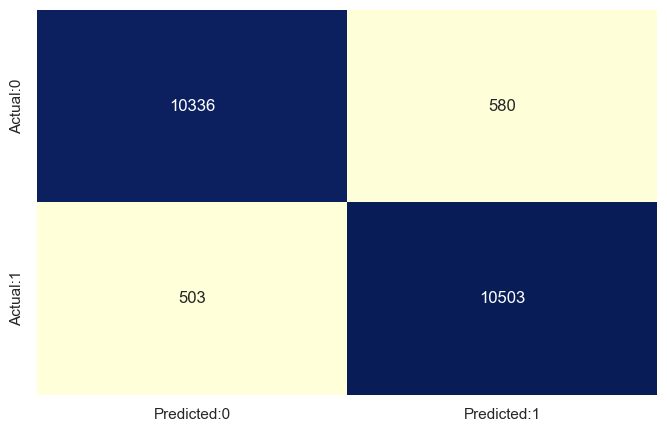

In [118]:
cm = confusion_matrix(y_test, y_pred_test_rf)
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])

# set sizeof the plot
plt.figure(figsize = (8,5))

# plot a heatmap
# cmap: colour code used for plotting
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
# cbar=False: Whether to draw a colorbar
# fmt: string formatting code to use when adding annotations
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu", cbar=False)
plt.show()

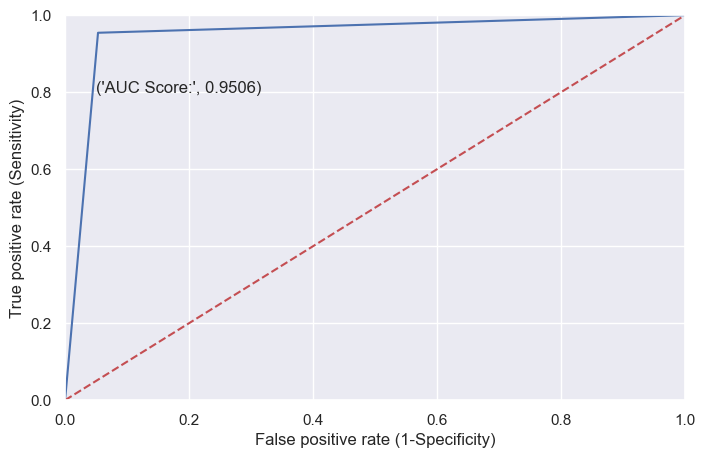

In [119]:
plt.rcParams['figure.figsize']=(8,5)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_rf)

# plot the ROC curve
plt.plot(fpr,tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add the AUC score
plt.text(x = 0.05, y = 0.8, s =('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_test_rf),4)))

# name the plot, and both axes
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')

# plot the grid
plt.grid(True)

#### We see our classifier (Random Forest) is far away from the dotted line; which means that Random Forest is a very good classifier

#### Tabulate the Results

In [120]:
Random_Forest_metrics = pd.Series({'Model': "Random Forest",
                     'AUC Score' : metrics.roc_auc_score(y_test, y_pred_test_rf),
                 'Precision Score': metrics.precision_score(y_test, y_pred_test_rf),
                 'Recall Score': metrics.recall_score(y_test, y_pred_test_rf),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred_test_rf),
                  'F1-Score':metrics.f1_score(y_test, y_pred_test_rf)})



# appending our result table
result = result.append(Random_Forest_metrics , ignore_index = True)

# view the result table
result

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8868\2843171134.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(Random_Forest_metrics , ignore_index = True)


,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,F1-Score
0,Logistic Regression,0.936490,0.944183,0.928312,0.936457,0.936180
1,AdaBoost,0.939584,0.945513,0.933400,0.939558,0.939417
2,Decision Tree,0.929856,0.923972,0.937489,0.929888,0.930681
3,Random Forest,0.950582,0.947668,0.954298,0.950598,0.950971


## KNN

In [121]:
from sklearn.neighbors import KNeighborsClassifier

In [122]:
from sklearn.model_selection import GridSearchCV

In [123]:
knn = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(2, 6)}

In [124]:
knn_gscv = GridSearchCV(knn, param_grid, cv=5)

In [125]:
knn_gscv.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([2, 3, 4, 5])})

In [126]:
y_pred_train_knn=knn_gscv.predict(x_train)
y_pred_test_knn=knn_gscv.predict(x_test)

In [127]:
print(confusion_matrix(y_train,y_pred_train_knn))
print(confusion_matrix(y_test,y_pred_test_knn))

[[25620     0]
 [  238 25292]]
[[ 9731  1185]
 [  226 10780]]


In [128]:
print(classification_report(y_train,y_pred_train_knn))
print(classification_report(y_test,y_pred_test_knn))

              precision    recall  f1-score   support

           0       0.99      1.00      1.00     25620
           1       1.00      0.99      1.00     25530

    accuracy                           1.00     51150
   macro avg       1.00      1.00      1.00     51150
weighted avg       1.00      1.00      1.00     51150

              precision    recall  f1-score   support

           0       0.98      0.89      0.93     10916
           1       0.90      0.98      0.94     11006

    accuracy                           0.94     21922
   macro avg       0.94      0.94      0.94     21922
weighted avg       0.94      0.94      0.94     21922



In [129]:
print(accuracy_score(y_train,y_pred_train_knn))
print(accuracy_score(y_test,y_pred_test_knn))

0.995347018572825
0.9356354347231092


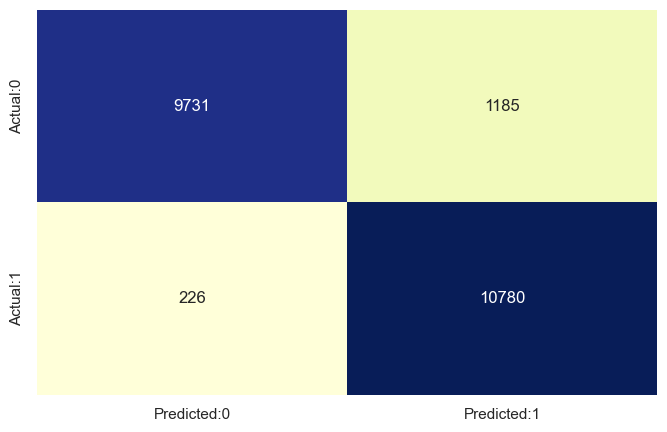

In [130]:
cm = confusion_matrix(y_test, y_pred_test_knn)
conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])

# set sizeof the plot
plt.figure(figsize = (8,5))

# plot a heatmap
# cmap: colour code used for plotting
# annot: prints the correlation values in the chart
# annot_kws: sets the font size of the annotation
# cbar=False: Whether to draw a colorbar
# fmt: string formatting code to use when adding annotations
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="YlGnBu", cbar=False)
plt.show()

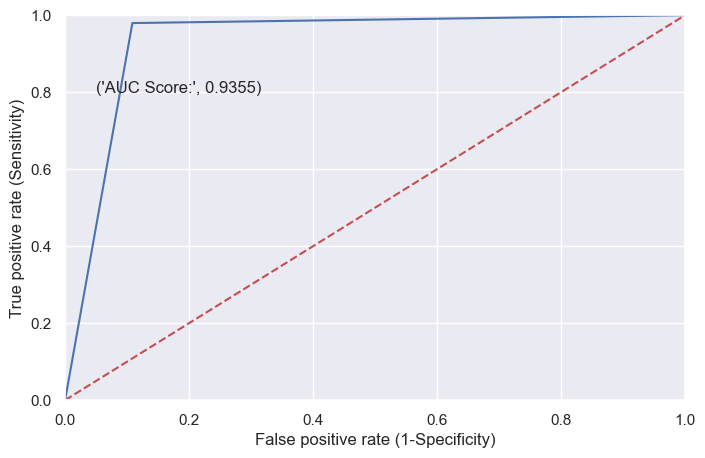

In [131]:
plt.rcParams['figure.figsize']=(8,5)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_test_knn)

# plot the ROC curve
plt.plot(fpr,tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add the AUC score
plt.text(x = 0.05, y = 0.8, s =('AUC Score:', round(metrics.roc_auc_score(y_test, y_pred_test_knn),4)))

# name the plot, and both axes
plt.xlabel('False positive rate (1-Specificity)')
plt.ylabel('True positive rate (Sensitivity)')

# plot the grid
plt.grid(True)

#### We see our classifier (KNN) is far away from the dotted line; which means that KNN is a very good classifier

#### Tabulate the Results

In [132]:
KNN_metrics = pd.Series({'Model': "KNN",
                     'AUC Score' : metrics.roc_auc_score(y_test, y_pred_test_knn),
                 'Precision Score': metrics.precision_score(y_test, y_pred_test_knn),
                 'Recall Score': metrics.recall_score(y_test, y_pred_test_knn),
                 'Accuracy Score': metrics.accuracy_score(y_test, y_pred_test_knn),
                  'F1-Score':metrics.f1_score(y_test, y_pred_test_knn)})



# appending our result table
result = result.append(KNN_metrics , ignore_index = True)

# view the result table
result

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8868\28579846.py:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result = result.append(KNN_metrics , ignore_index = True)


,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,F1-Score
0,Logistic Regression,0.936490,0.944183,0.928312,0.936457,0.936180
1,AdaBoost,0.939584,0.945513,0.933400,0.939558,0.939417
2,Decision Tree,0.929856,0.923972,0.937489,0.929888,0.930681
3,Random Forest,0.950582,0.947668,0.954298,0.950598,0.950971
4,KNN,0.935455,0.900961,0.979466,0.935635,0.938575


## Model Comparison

In [133]:
result

,Model,AUC Score,Precision Score,Recall Score,Accuracy Score,F1-Score
0,Logistic Regression,0.936490,0.944183,0.928312,0.936457,0.936180
1,AdaBoost,0.939584,0.945513,0.933400,0.939558,0.939417
2,Decision Tree,0.929856,0.923972,0.937489,0.929888,0.930681
3,Random Forest,0.950582,0.947668,0.954298,0.950598,0.950971
4,KNN,0.935455,0.900961,0.979466,0.935635,0.938575


#### It can be seen from the result tabulation, that performance measures for the Random Forest is better than other models.